In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import gc
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
#from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve

# 1. Cleaning the data

In [2]:
df = pd.read_csv("banking_data.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# 1.2 
- Missing data
- Duplicate values
- White spaces
- Value consistency: case errors, capitalisation case mistaces and trailing spaces

In [5]:
# Checking missing values
df.isna().values.any()

False

In [6]:
# Verification
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# Checking duplicated values
df.duplicated().sum()

0

In [8]:
# Remove white spaces

In [9]:
df.columns = df.columns.str.replace(" ", "")

In [10]:
# Value consitency of each feature
job_status = df['job']
job_status.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [11]:
marriage_status = df['marital']
marriage_status.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [12]:
education_status = df['education']
education_status.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [13]:
default_status = df['default']
default_status.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [14]:
balance_status = df['balance']
balance_status.value_counts()

0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: balance, Length: 2353, dtype: int64

In [15]:
housing_status = df['housing']
housing_status.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [16]:
loan_status = df['loan']
loan_status.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [17]:
contact_status = df['contact']
contact_status.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [18]:
day_status = df['day']
day_status.value_counts()

20    257
18    226
19    201
21    198
14    195
17    191
7     190
6     187
28    181
5     181
8     180
29    175
15    174
30    168
13    166
16    164
9     163
11    152
12    151
4     139
2     114
27    113
26    110
3     105
23    102
22     86
25     80
31     59
10     50
24     36
1      27
Name: day, dtype: int64

In [19]:
month_status = df['month']
month_status.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [20]:
duration_status = df['duration']
duration_status.value_counts()

123     27
104     25
119     23
77      22
58      22
        ..
762      1
602      1
923      1
1032     1
660      1
Name: duration, Length: 875, dtype: int64

In [21]:
campaign_status = df['campaign']
campaign_status.value_counts()

1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
19       3
20       3
28       3
24       3
32       2
21       2
23       2
22       2
31       1
29       1
50       1
30       1
44       1
Name: campaign, dtype: int64

In [22]:
pdays_status = df['pdays']
pdays_status.value_counts()

-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: pdays, Length: 292, dtype: int64

In [23]:
previous_status = df['previous']
previous_status.value_counts()

0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
24       1
22       1
23       1
17       1
18       1
15       1
13       1
19       1
20       1
25       1
Name: previous, dtype: int64

In [24]:
poutcome_status = df['poutcome']
poutcome_status.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [25]:
y_status = df['y']
y_status.value_counts()

no     4000
yes     521
Name: y, dtype: int64

# 1.3 Pearson Correlation Coefficient

In [26]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


# 2. Processing, Visualisation and Data Analysis
- Categorical Features: job, marital, education, default, housing, loan, poutcome, y
- Numerical data: Box plots(detect outliers) 

## 2.1 Categoric Features

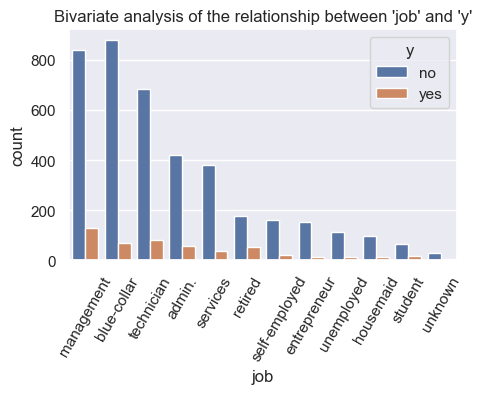

In [27]:
# Job Feature
# setting the theme
sns.set_theme(style='darkgrid')
# figure size
sns.set(rc = {'figure.figsize': (5,3)})
# creating countplot
job = sns.countplot( x='job', data=df, hue='y', order = df['job'].value_counts().index)
# rotating x-label
job.tick_params(axis='x', rotation=60)
# tile
plt.title("Bivariate analysis of the relationship between 'job' and 'y'")
plt.show()

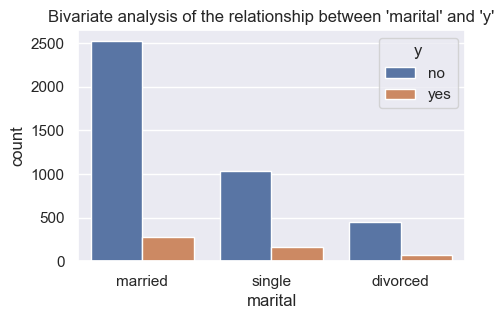

In [28]:
# Marital feature
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize': (5,3)})
marital = sns.countplot(x='marital', data=df, hue='y', order= df['marital'].value_counts().index)
marital.tick_params(axis='x')
plt.title("Bivariate analysis of the relationship between 'marital' and 'y'")
plt.show()

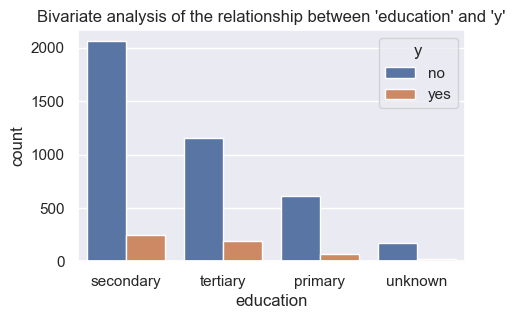

In [29]:
# Education feature
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3))
education = sns.countplot(x='education', data=df, hue='y', order = df['education'].value_counts().index)
education.tick_params(axis='x')
plt.title("Bivariate analysis of the relationship between 'education' and 'y'")
plt.show()

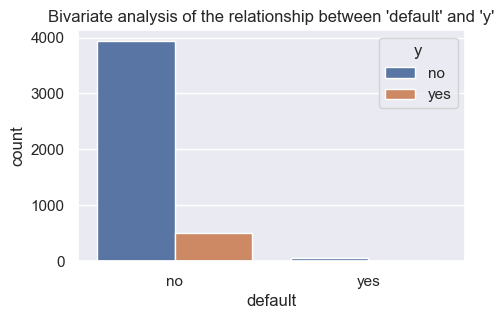

In [30]:
# Defaulte feature
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3))
default = sns.countplot(x='default', data=df, hue='y', order = df['default'].value_counts().index)
default.tick_params(axis='x')
plt.title("Bivariate analysis of the relationship between 'default' and 'y'")
plt.show()

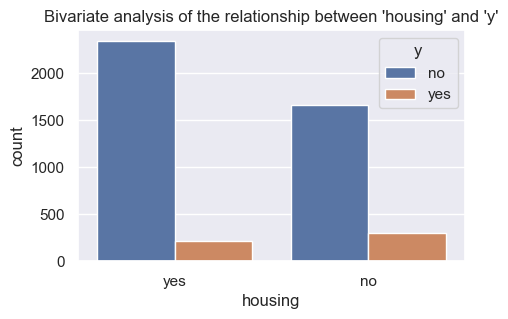

In [31]:
# Housing feature
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3))
housing = sns.countplot(x='housing', data=df, hue='y', order = df['housing'].value_counts().index)
housing.tick_params(axis='x')
plt.title("Bivariate analysis of the relationship between 'housing' and 'y'")
plt.show()

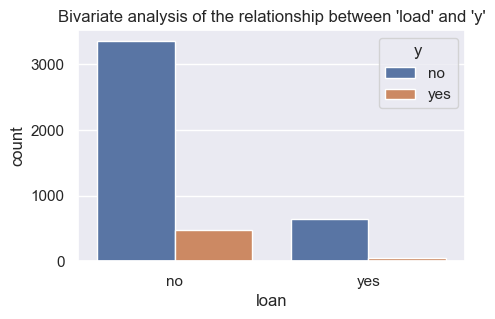

In [32]:
# Loan feature
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3))
loan = sns.countplot(x='loan', data=df, hue='y', order = df['loan'].value_counts().index)
loan.tick_params(axis='x')
plt.title("Bivariate analysis of the relationship between 'load' and 'y'")
plt.show()

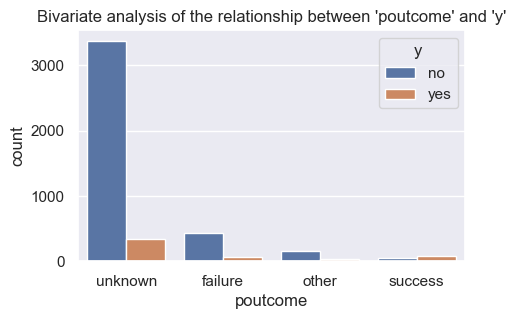

In [33]:
# Poutcome features
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3))
loan = sns.countplot(x='poutcome', data=df, hue='y', order = df['poutcome'].value_counts().index)
loan.tick_params(axis='x')
plt.title("Bivariate analysis of the relationship between 'poutcome' and 'y'")
plt.show()

## Numerical Data 

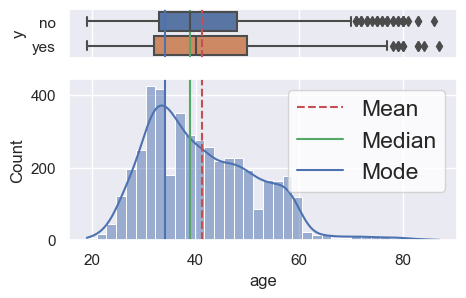

In [34]:
# Age features
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(9,7)}, font_scale=1.5, style='whitegrid')
mean=df['age'].mean()
median=df['age'].median()
mode=df['age'].mode().values[0]

age = sns.boxplot(data=df, x="age", y="y", ax=ax_box, order = df["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="age", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

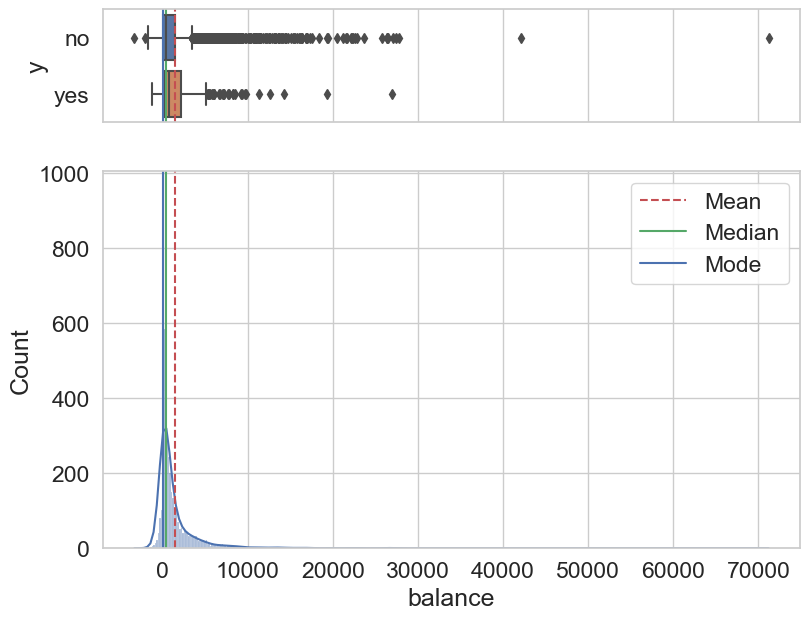

In [35]:
# Balance features
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(9,7)}, font_scale=1.5, style='whitegrid')
mean=df['balance'].mean()
median=df['balance'].median()
mode=df['balance'].mode().values[0]

age = sns.boxplot(data=df, x="balance", y="y", ax=ax_box, order = df["y"].value_counts().index)

ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="balance", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

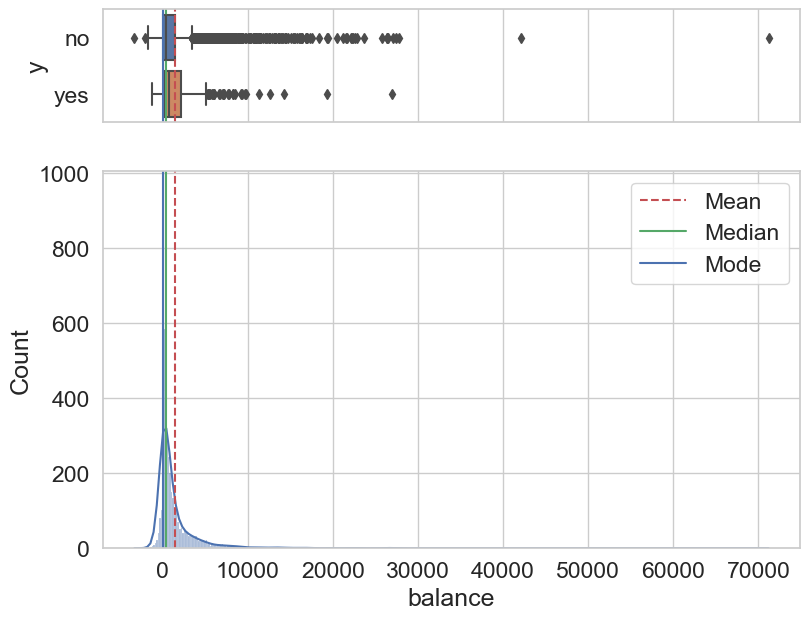

In [36]:
# Day feature
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(9,7)}, font_scale=1.5, style='whitegrid')
mean=df['balance'].mean()
median=df['balance'].median()
mode=df['balance'].mode().values[0]

age = sns.boxplot(data=df, x="balance", y="y", ax=ax_box, order = df["y"].value_counts().index)

ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="balance", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

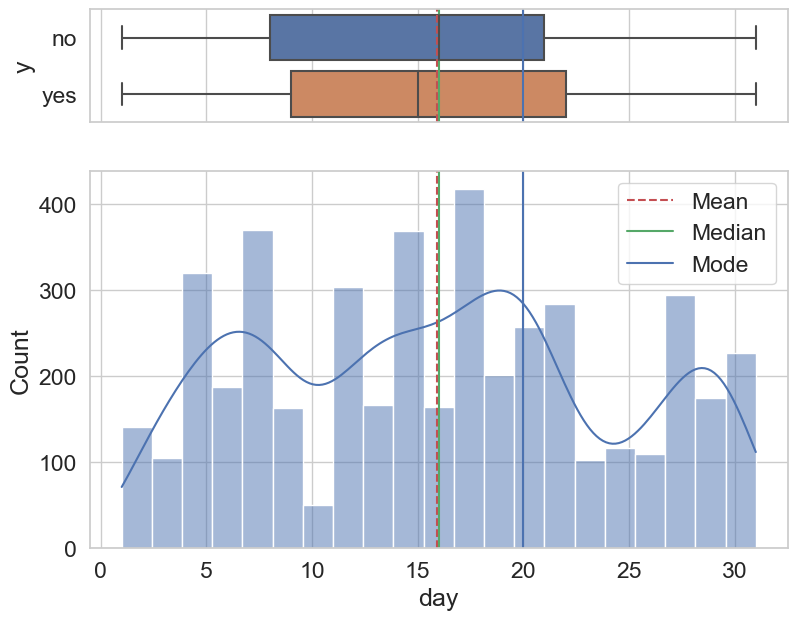

In [37]:
# Day features
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(9,7)}, font_scale=1.5, style='whitegrid')
mean=df['day'].mean()
median=df['day'].median()
mode=df['day'].mode().values[0]

age = sns.boxplot(data=df, x="day", y="y", ax=ax_box, order = df["y"].value_counts().index)

ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="day", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

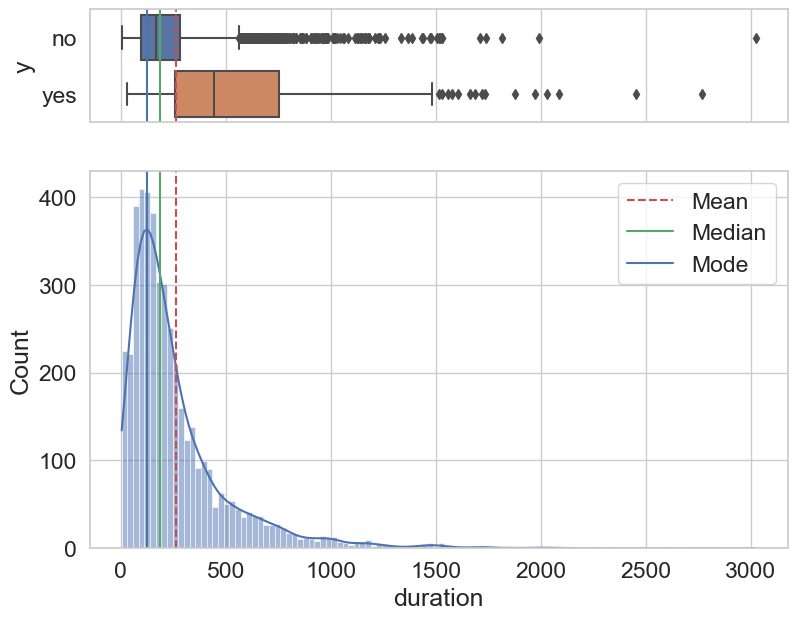

In [38]:
# Duraton features
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(9,7)}, font_scale=1.5, style='whitegrid')
mean=df['duration'].mean()
median=df['duration'].median()
mode=df['duration'].mode().values[0]

age = sns.boxplot(data=df, x="duration", y="y", ax=ax_box, order = df["y"].value_counts().index)

ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="duration", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

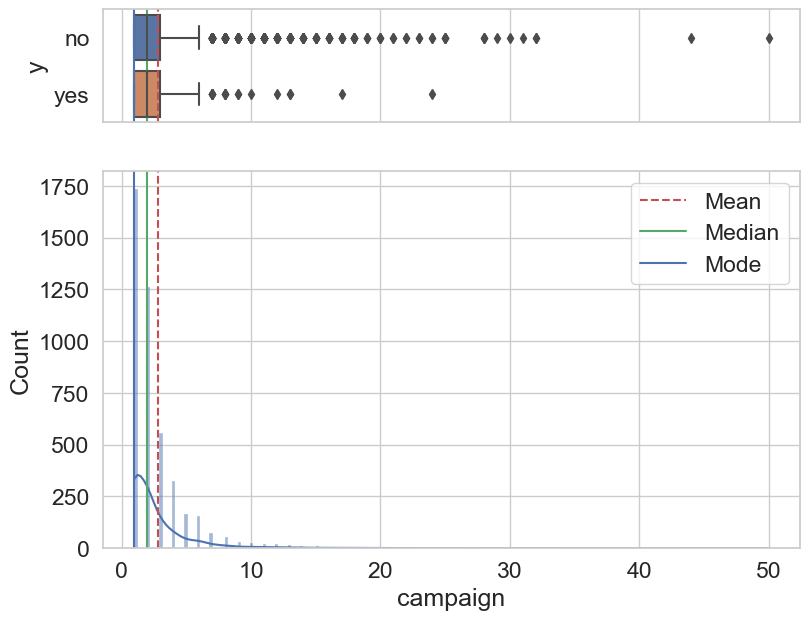

In [39]:
# Campaign features
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(9,7)}, font_scale=1.5, style='whitegrid')
mean=df['campaign'].mean()
median=df['campaign'].median()
mode=df['campaign'].mode().values[0]

age = sns.boxplot(data=df, x="campaign", y="y", ax=ax_box, order = df["y"].value_counts().index)

ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="campaign", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

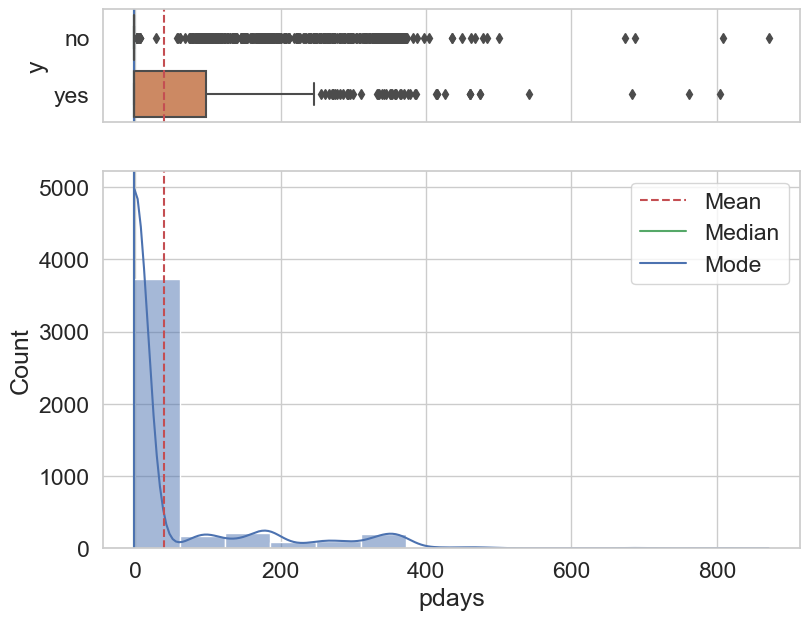

In [40]:
# pdays features
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(9,7)}, font_scale=1.5, style='whitegrid')
mean=df['pdays'].mean()
median=df['pdays'].median()
mode=df['pdays'].mode().values[0]

age = sns.boxplot(data=df, x="pdays", y="y", ax=ax_box, order = df["y"].value_counts().index)

ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="pdays", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

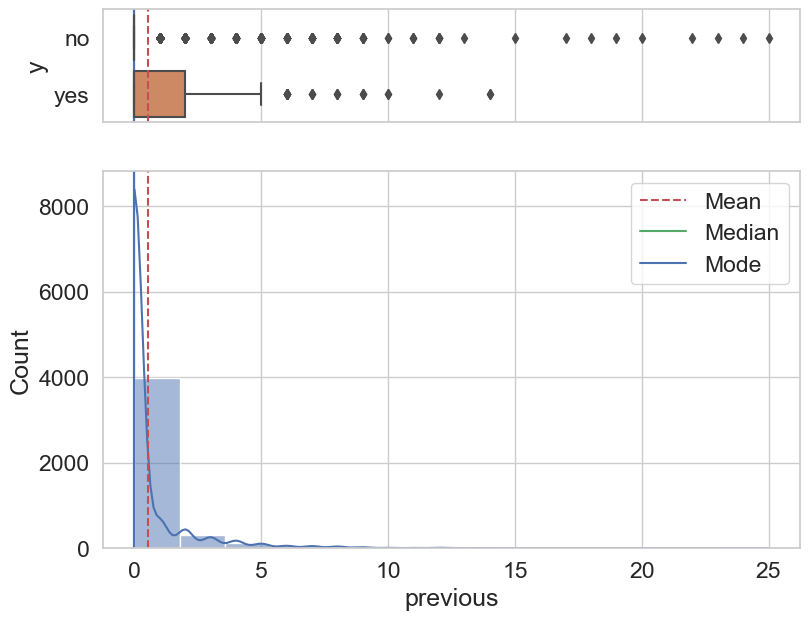

In [41]:
# Previous features
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(9,7)}, font_scale=1.5, style='whitegrid')
mean=df['previous'].mean()
median=df['previous'].median()
mode=df['previous'].mode().values[0]

age = sns.boxplot(data=df, x="previous", y="y", ax=ax_box, order = df["y"].value_counts().index)

ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="previous", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

## Loking for noisy data in columns: balance, day, duration, campaign, pdays and previous

In [42]:
df[['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].describe()

,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [54]:
# Percentage of 'balance' values above 500:
len(df[df['balance']> 500]) / len(df) * 100

47.201946472019465

In [48]:
# Percentage of 'duration' values above 1500:
len(df[df['duration']> 1500]) / len(df) * 100

0.5529750055297501

In [47]:
# Percentage of 'campaign' values above 10:
len(df[df['campaign']> 10]) / len(df) * 100

2.8754700287547

In [49]:
# Percentage of 'pdays' values above 250:
len(df[df['pdays']> 250]) / len(df) * 100

7.2992700729927

In [50]:
# Percentage of 'previous' values above 5:
len(df[df['previous']> 5]) / len(df) * 100

2.18978102189781

## Analysis of the response column
- Comparing how 'Job' column value varies depending on other categorical columns

<AxesSubplot:title={'center':'Marital Status and Jobs'}>

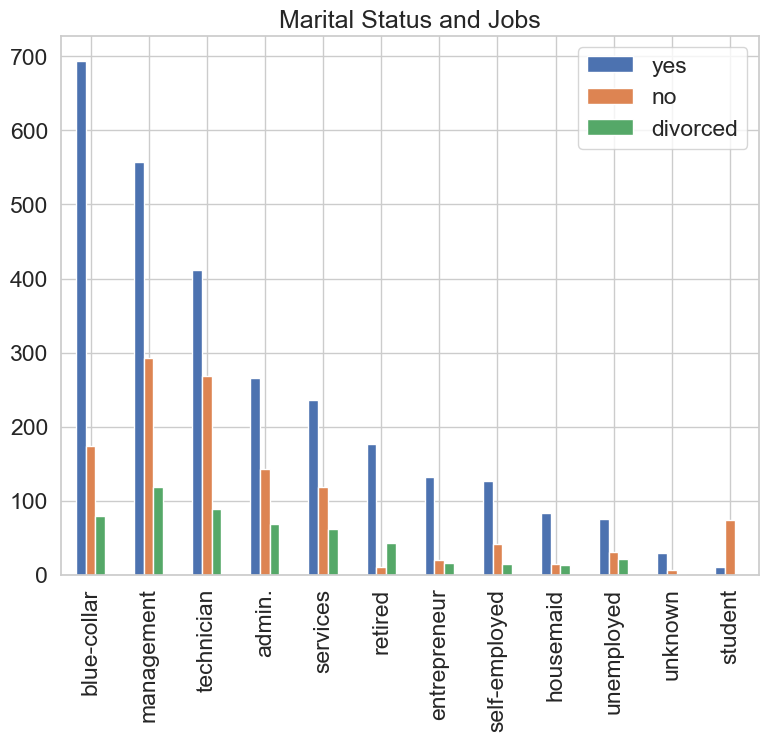

In [69]:
#  Comparing the values of Job and Marital
m_df = pd.DataFrame()

m_df['yes'] = df[df['marital'] == 'married']['job'].value_counts()
m_df['no'] = df[df['marital'] == 'single']['job'].value_counts()
m_df['divorced'] = df[df['marital'] == 'divorced']['job'].value_counts()

m_df.plot.bar(title = 'Marital Status and Jobs')

<AxesSubplot:title={'center':'Housing status and Jobs'}>

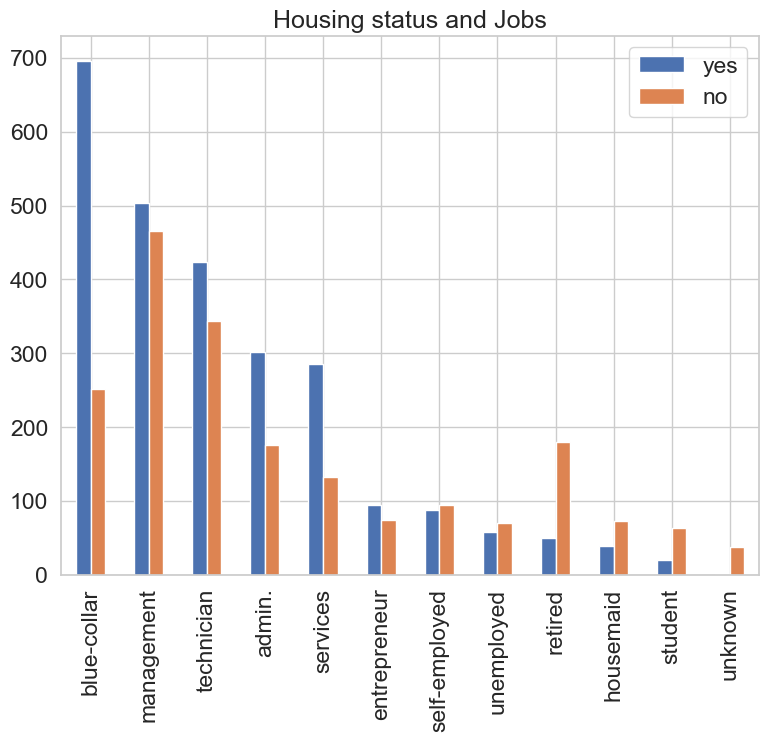

In [72]:
# Comparing the values of Job and Housing
h_df = pd.DataFrame()

h_df['yes'] = df[df['housing'] == 'yes']['job'].value_counts()
h_df['no'] = df[df['housing'] == 'no']['job'].value_counts()

h_df.plot.bar(title = 'Housing status and Jobs')

<AxesSubplot:title={'center':'Loan status and Jobs'}>

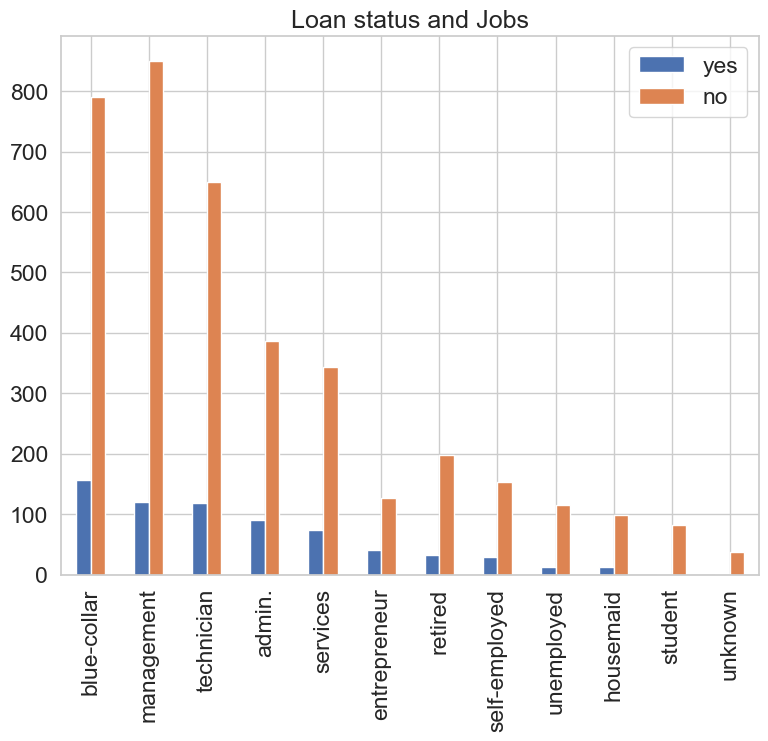

In [71]:
# Comparing the values of Job and Loan 
l_df = pd.DataFrame()

l_df['yes'] = df[df['loan'] == 'yes']['job'].value_counts()
l_df['no'] = df[df['loan'] == 'no']['job'].value_counts()

l_df.plot.bar(title = 'Loan status and Jobs')

## How numerical columns affect term balance subscription

In [79]:
#balance and age

a_df = pd.DataFrame()
a_df['balance_high'] = (df[df['balance'] > 1422][['balance', 'age']].describe())['age']
a_df['balance_low'] = (df[df['balance'] < 1422][['balance', 'age']].describe())['age']

a_df

,balance_high,balance_low
count,1162.000000,3359.000000
mean,42.802926,40.605240
std,11.051982,10.348435
min,21.000000,19.000000
25%,34.000000,33.000000
50%,41.000000,39.000000
75%,50.000000,48.000000
max,86.000000,87.000000


<AxesSubplot:title={'center':'Age and balance statistics'}>

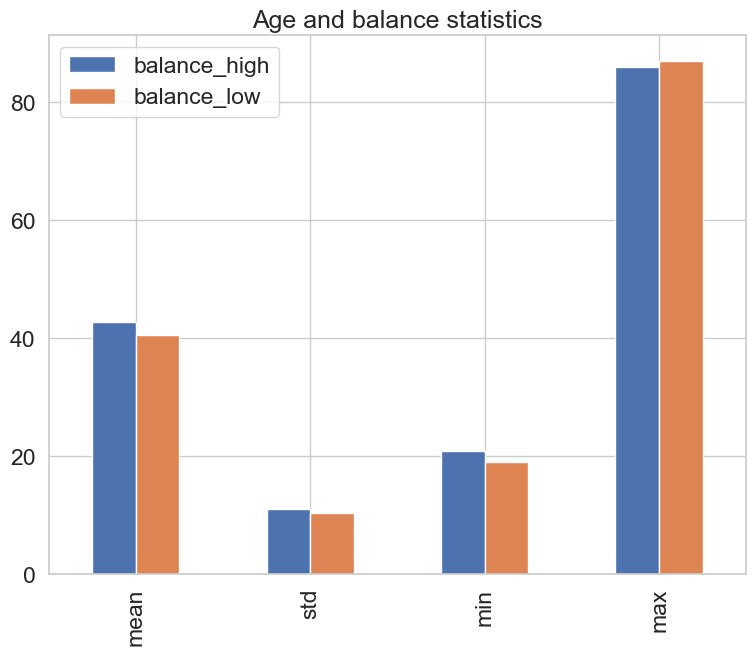

In [81]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title='Age and balance statistics')

In [83]:
#number of contacts performed during this campaign ('campaign') and balance
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['balance'] == 'yes'][['balance','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['balance'] == 'no'][['balance','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN
